Perceptron Multicapa para clasficiar dígitos en el Data set MNIST, del curso de Deep Learning con Pytorch de Datacamp

In [0]:
#instacion de pytorch
!pip3 install torch torchvision

In [0]:
#verificando gpu
import torch
torch.cuda.is_available()

True

In [0]:
!sudo apt-get install libgmp3-dev cmake automake libtool

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
The following additional packages will be installed:
  autoconf autotools-dev file libgmp-dev libgmpxx4ldbl libmagic-mgc libmagic1
  libsigsegv2 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext gmp-doc libgmp10-doc
  libmpfr-dev libtool-doc gcj-jdk m4-doc
The following NEW packages will be installed:
  autoconf automake autotools-dev file libgmp-dev libgmp3-dev libgmpxx4ldbl
  libmagic-mgc libmagic1 libsigsegv2 libtool m4
0 upgraded, 12 newly installed, 0 to remove and 8 not upgraded.
Need to get 1,878 kB of archives.
After this operation, 12.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic-mgc amd64 1:5.32-2ubuntu0.2 [184 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic1 amd64 1:5.32-2ubuntu0.2 [68.5 kB]


In [0]:
#version de python
import sys
sys.version

'3.6.8 (default, Jan 14 2019, 11:02:34) \n[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]'

In [0]:
#version de torch
import torch
print(torch.__version__)

1.1.0


In [0]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [0]:
#importando las librerias
import torch
import torchvision
import torch.utils.data
import torchvision.transforms as transforms

In [0]:
# Transform the data to torch tensors and normalize it 
transform = transforms.Compose([transforms.ToTensor(),
								transforms.Normalize((0.1307,), ((0.3081,)))])

# Prepare training set and testing set
trainset = torchvision.datasets.MNIST('drive/My Drive/mnist', train=True, 
									  download=True, transform=transform)
testset = torchvision.datasets.MNIST('drive/My Drive/mnist', train=False,
			   download=True, transform=transform)

# Prepare training loader and testing loader
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=0)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
										 shuffle=False, num_workers=0) 

0it [00:00, ?it/s]

9920512it [00:02, 3649132.28it/s]                             


Extracting drive/My Drive/mnist/MNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 57295.93it/s]                           
0it [00:00, ?it/s]

Extracting drive/My Drive/mnist/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:01, 956552.72it/s]                             
0it [00:00, ?it/s]

Extracting drive/My Drive/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 21688.85it/s]            

Extracting drive/My Drive/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
# Compute the shape of the training set and testing set
trainset_shape = trainloader.dataset.train_data.shape
testset_shape = testloader.dataset.test_data.shape

# Print the computed shapes
print(trainset_shape,testset_shape)

# Compute the size of the minibatch for training set and testing set
trainset_batchsize = trainloader.batch_size
testset_batchsize = testloader.batch_size

# Print sizes of the minibatch
print(trainset_batchsize, testset_batchsize)

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])
32 32


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


In [0]:
import torch.nn as nn
import torch.nn.functional as F
# Define the class Net
class Net(nn.Module):
    def __init__(self):    
    	# Define all the parameters of the net
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28 * 1, 200)
        self.fc2 = nn.Linear(200,10)

    def forward(self, x):   
    	# Do the forward pass
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [0]:
import torch.optim as optim
model = Net()
# Instantiate the Adam optimizer and Cross-Entropy loss function
optimizer = optim.Adam(model.parameters(), lr=3e-4)
criterion = nn.CrossEntropyLoss()
  
for batch_idx, data_target in enumerate(trainloader):
    data = data_target[0]
    target = data_target[1]
    data = data.view(-1, 28 * 28)
    optimizer.zero_grad()

    # Complete a forward pass
    output = model(data)

    # Compute the loss, gradients and change the weights
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()

In [0]:
import numpy as np
correct, total = 0, 0

#predichos
testset_predicted = np.array([])

# Set the model in eval mode
model.eval()

for i, data in enumerate(testloader, 0):
    inputs, labels = data
    
    # Put each image into a vector
    inputs = inputs.view(-1, 28*28)
    
    # Do the forward pass and get the predictions
    outputs = model(inputs)
    _, outputs = torch.max(outputs.data,1)
    testset_predicted = np.append(testset_predicted,outputs.numpy())
    total += labels.size(0)
    correct += (outputs == labels).sum().item()
print('The testing set accuracy of the network is: %d %%' % (100 * correct / total))

The testing set accuracy of the network is: 95 %


In [0]:
#datos de entrenamiento
#60000
trainset.data
#etiquetas de los datos de entrenamiento
trainset.train_labels

#datos de prueba
#10000
testset.data
#etiquetas de los datos de prueba
testset.test_labels

#etiquetas predichas
testset_predicted

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


array([7., 2., 1., ..., 4., 5., 6.])

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


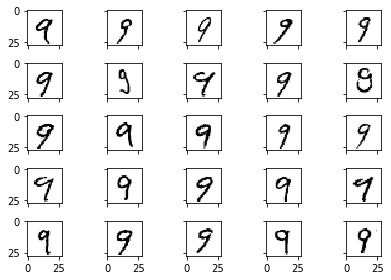

In [0]:
import matplotlib.pyplot as plt
#graficar 20 numeros 9
fig, ax = plt.subplots(nrows=5,ncols=5,sharex=True,sharey=True)
ax = ax.flatten()

for i in range(25):
  img = trainset.data[trainset.train_labels==9][i]
  ax[i].imshow(img, cmap='Greys')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


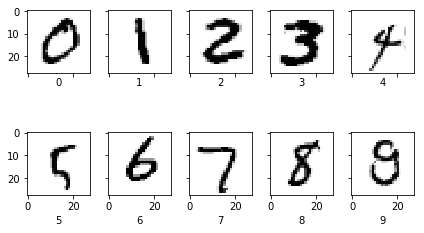

In [0]:
#graficar 10 numeros
fig, ax = plt.subplots(nrows=2,ncols=5,sharex=True,sharey=True)
ax = ax.flatten()

lista_etiquetas=[]

for i in range(10):
  img = trainset.data[trainset.train_labels==i][i]
  lista_etiquetas.append(trainset.test_labels[trainset.train_labels==i][i])
  ax[i].imshow(img, cmap='Greys')

lista_etiquetas = [etiqueta.numpy().tolist() for etiqueta in lista_etiquetas]

for i, axs in enumerate(ax.flat):
  axs.set(xlabel=str(lista_etiquetas[i]))

plt.tight_layout()
plt.show()

In [0]:
#se convierte a un tensor de enteros testset_predicted
testset_predicted = torch.from_numpy(testset_predicted)
testset_predicted = testset_predicted.type(torch.LongTensor)

In [0]:
#la cantidad de imágenes predecidas correctamente
print('La cantidad de imágenes predecidas correctamente')
print(correct)

#el número de imágenes en las que se equivocó la red neuronal
print('El número de imágenes en las que se equivocó la red neuronal')
print(10000-correct)

La cantidad de imágenes predecidas correctamente
9507
El número de imágenes en las que se equivocó la red neuronal
493


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


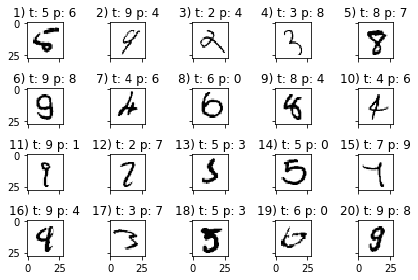

In [0]:
#mostrar 20 imágenes en las que se cometió error en la predicción

miscl_img = testset.data[testset.test_labels != testset_predicted][:20]
correct_lab = testset.test_labels[testset.test_labels != testset_predicted][:20]
miscl_lab = testset_predicted[testset.test_labels != testset_predicted][:20]

fig, ax = plt.subplots(nrows=4,ncols=5,sharex=True,sharey=True)
ax = ax.flatten()

lista_etiquetas=[]

for i in range(20):
  img = miscl_img[i]
  ax[i].imshow(img, cmap='Greys')
  ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))


plt.tight_layout()
plt.show()

In [0]:
#from google.colab import drive
#drive.mount('/content/drive')